<a href="https://www.kaggle.com/code/georgistan/mental-disorder-classifier?scriptVersionId=167872085" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mental Disorder Classification

# Mental Disorder Classification and Prediction

- I manually labeled encoded various types of mental disorders (e.g., depression, bipolar disorder type-2) for classification purposes
- I employed a diverse range of machine learning algorithms including Random Forest, Support Vector Machine (SVM), Naive Bayes, k-Nearest  Neighbors (KNN), Decision Tree, Gradient Boosting, and Logistic Regression for predictive modeling
- I utilized cross-validation techniques to assess and compare the performance of each model.

# Technologies and tools used:

Python, scikit-learn, pandas, numpy, matplotlib, seaborn


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
mental_dis = pd.read_csv('/kaggle/input/mental-disorder-classification/Dataset-Mental-Disorders.csv')
mental_dis.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


In [3]:
mental_dis = mental_dis.drop('Patient Number', axis=1)

Feature names are pretty straightforward in regards to their meaning. Since the values in the dataset are mostly qualitative, I will change them into numeric representations.

First, get unique values for each entry so that we could gather how to label encode them.

In [4]:
for column in mental_dis.columns:
    unique_count = mental_dis[column].nunique()
    unique_values = mental_dis[column].unique()

    print(f"The number of unique values in {column}: {unique_count}")
    print(f"Unique values in {column}:")
    for value in unique_values:
          print(value)
    print('\n')

The number of unique values in Sadness: 4
Unique values in Sadness:
Usually
Sometimes
Seldom
Most-Often


The number of unique values in Euphoric: 4
Unique values in Euphoric:
Seldom
Most-Often
Usually
Sometimes


The number of unique values in Exhausted: 4
Unique values in Exhausted:
Sometimes
Usually
Seldom
Most-Often


The number of unique values in Sleep dissorder: 4
Unique values in Sleep dissorder:
Sometimes
Most-Often
Usually
Seldom


The number of unique values in Mood Swing: 2
Unique values in Mood Swing:
YES
NO


The number of unique values in Suicidal thoughts: 3
Unique values in Suicidal thoughts:
YES 
YES
NO


The number of unique values in Anorxia: 2
Unique values in Anorxia:
NO
YES


The number of unique values in Authority Respect: 2
Unique values in Authority Respect:
NO
YES


The number of unique values in Try-Explanation: 2
Unique values in Try-Explanation:
YES
NO


The number of unique values in Aggressive Response: 2
Unique values in Aggressive Response:
NO
YES


T

In [5]:
mental_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 16  Optimisi

In [6]:
mental_dis['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

In [7]:
mental_dis['Suicidal thoughts'] = mental_dis['Suicidal thoughts'].replace('YES ', "YES")
mental_dis['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO     63
YES    57
Name: count, dtype: int64

## Map descriptive labels to numeric values

In [8]:
missing_data = mental_dis.isnull().sum()
missing_data

Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64

In [9]:
mapping_dict = {'Normal': 0, 'Bipolar Type-1': 1, 'Bipolar Type-2': 2, 'Depression': 3}
mental_dis['Expert Diagnose'] = mental_dis['Expert Diagnose'].map(mapping_dict).astype(int)
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,0


In [10]:
yes_and_no_columns = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation', 'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down', 'Admit Mistakes', 'Overthinking']

for column in yes_and_no_columns:
    mental_dis[column] = mental_dis[column].map({'YES': 1, 'NO': 0}).astype(int)
    
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,0


In [11]:
mental_dis['Sexual Activity'].dtype

dtype('O')

In [12]:
mental_dis = mental_dis.rename(columns={'Optimisim': 'Optimism'})
mental_dis = mental_dis.rename(columns={'Anorxia': 'Anorexia'})

In [13]:
from_columns = ['Sexual Activity', 'Concentration', 'Optimism']
for column in from_columns:
    mental_dis[column] = mental_dis[column].astype(str).str.extract('(\d)')
    mental_dis[column] = pd.to_numeric(mental_dis[column])
    
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [14]:
mental_dis['Sexual Activity'].dtype

dtype('int64')

In [15]:
frequency_columns = ['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder']
for column in frequency_columns:
    mental_dis[column] = mental_dis[column].map({'Seldom': 0, 'Sometimes': 1, 'Usually': 2, 'Most-Often': 3}).astype(int)
    
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


## EDA

In [16]:
mental_dis.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.550000,0.933333,1.633333,1.458333,0.475000,0.475000,0.383333,0.391667,0.475000,0.483333,0.416667,0.516667,0.491667,0.541667,4.741667,4.250000,4.466667,1.525000
std,0.924458,0.923396,1.020243,0.977871,0.501468,0.501468,0.488237,0.490169,0.501468,0.501817,0.495074,0.501817,0.502027,0.500350,2.010459,1.797524,1.991298,1.129903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,0.750000
50%,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,4.000000,4.000000,2.000000
75%,2.000000,1.000000,2.250000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,6.000000,3.000000
max,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,8.000000,9.000000,3.000000


### Heatmap for correlation analysis

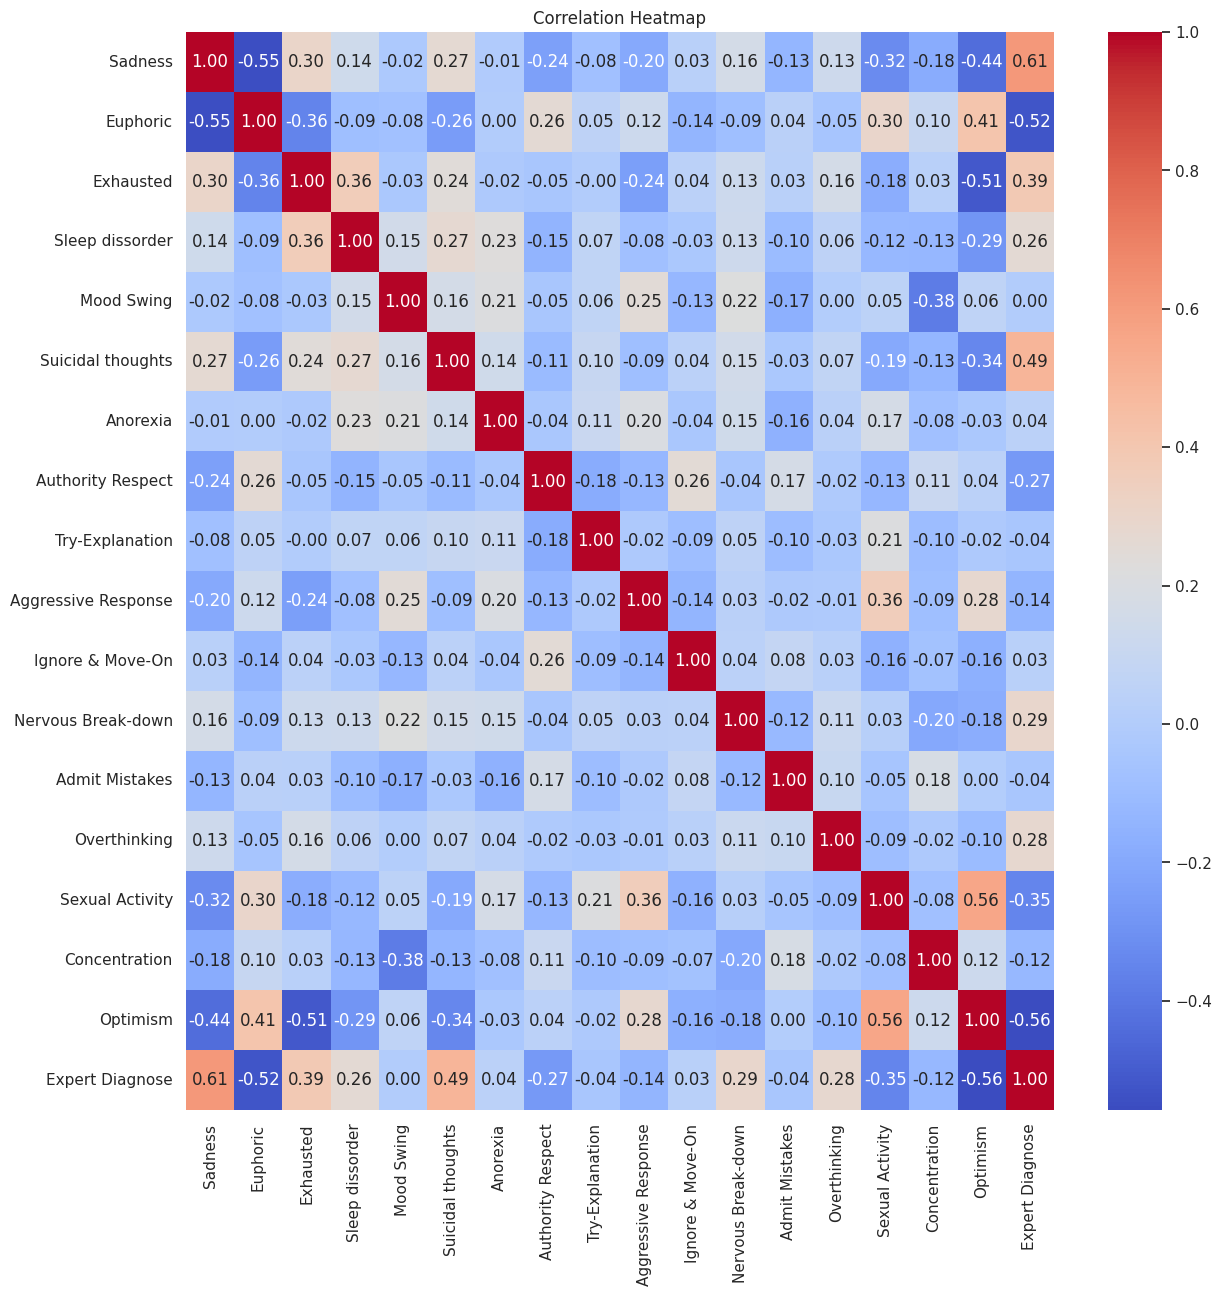

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

correlation_matrix = mental_dis.corr()

# create a heatmap
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')

plt.title('Correlation Heatmap')
plt.show()


### Stacked bar plot for each level of sadness

Sadness levels:
- Seldom: 0
- Sometimes: 1
- Usually: 2
- Most-Often: 3

Expert Diagnose: 
- Normal: 0
- Bipolar Type-1: 1
- Bipolar Type-2: 2
- Depression: 3

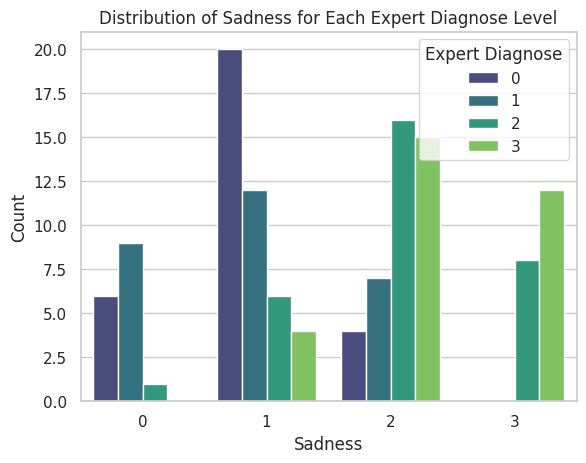

In [18]:
sns.countplot(x = 'Sadness', hue = 'Expert Diagnose', data = mental_dis, palette = 'viridis')
plt.title('Distribution of Sadness for Each Expert Diagnose Level')
plt.xlabel('Sadness')
plt.ylabel('Count')
plt.show()

The sadder the patients, the more likely to suffer from more severe mental disorders, such as depression or bipolar-type 2 disorder.

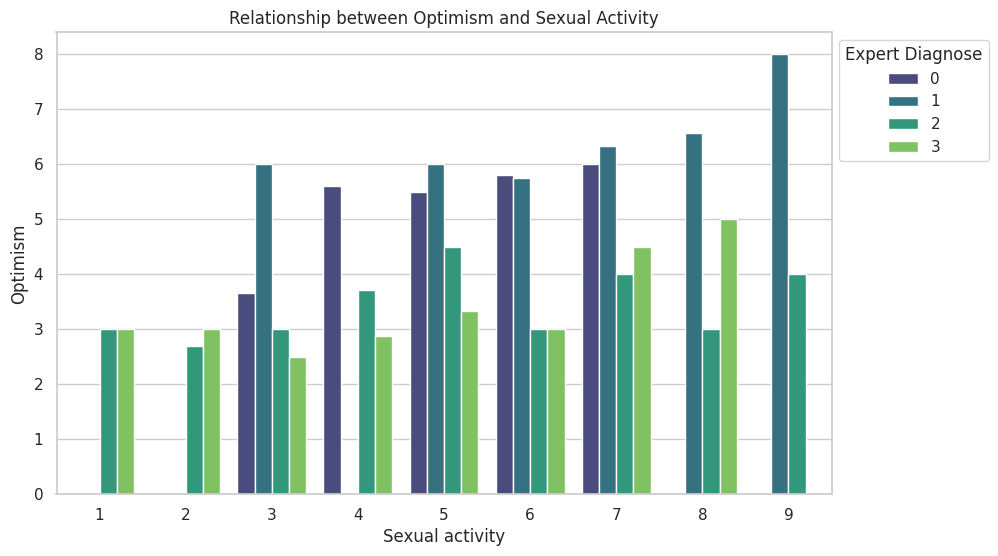

In [19]:
plt.figure(figsize=(10, 6))

sns.barplot(y = 'Optimism', x = 'Sexual Activity', hue = 'Expert Diagnose', data = mental_dis, errorbar = None, palette = 'viridis')
plt.title('Relationship between Optimism and Sexual Activity')
plt.xlabel('Sexual activity')
plt.ylabel('Optimism')

# place the legend at the top-right corner of the plot, outside the plot area
plt.legend(title = 'Expert Diagnose', bbox_to_anchor=(1, 1))

plt.show()

Interestingly, patients with the highest sexual activity seem to be the most optimistic and be less prone to depression, while those with the lowest sexual activity suffer from the most severe mental disorders described by the dataset and have low levels optimism as well.

Other results from the heatmap that I found interesting were the fact that those more exhausted are less likely to be euphoric, euhaustion is also inversely correlated with optimism, and the aggresive response is positively correlated with the sexual activity. No wonder on the other hand that suicidal thoughts are positively associated with the mental health problems (expert diagnose).

## Modeling

In [20]:
mental_dis.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorexia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimism,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,3
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,0


In [21]:
X = mental_dis.iloc[:, :-1]
y = mental_dis['Expert Diagnose']

## Random Forest

### Grid search for hyperparameter tuning


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state = 0)

# instantiate GridSearchCV
grid_search = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, verbose = 0)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# set the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


By defining a grid of hyperparameters, we basically evaluate the model performance for each combination of hyperparameters. This helps in finding the optimal set of hyperparameters for the machine learning model.

In [23]:
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state = 0) # dict unpacking

# fit the new classifier on the training data
optimized_rf_classifier.fit(X_train, y_train)

# make predictions on the test and train data
y_pred_test = optimized_rf_classifier.predict(X_test)
y_pred_train = optimized_rf_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
rf_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {rf_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 100.00%
Testing Accuracy: 95.83%
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      0.50      0.67         2

    accuracy                           0.96        24
   macro avg       0.97      0.88      0.90        24
weighted avg       0.96      0.96      0.95        24



### Bar chart showing the relative importance of each feature

Feature ranking:
1. Feature 4: Mood Swing (0.2964)
2. Feature 16: Optimism (0.1472)
3. Feature 14: Sexual Activity (0.1235)
4. Feature 0: Sadness (0.0862)
5. Feature 1: Euphoric (0.0492)
6. Feature 5: Suicidal thoughts (0.0490)
7. Feature 15: Concentration (0.0361)
8. Feature 2: Exhausted (0.0324)
9. Feature 3: Sleep dissorder (0.0304)
10. Feature 9: Aggressive Response (0.0289)
11. Feature 7: Authority Respect (0.0261)
12. Feature 13: Overthinking (0.0234)
13. Feature 11: Nervous Break-down (0.0196)
14. Feature 6: Anorexia (0.0178)
15. Feature 10: Ignore & Move-On (0.0130)
16. Feature 12: Admit Mistakes (0.0117)
17. Feature 8: Try-Explanation (0.0093)


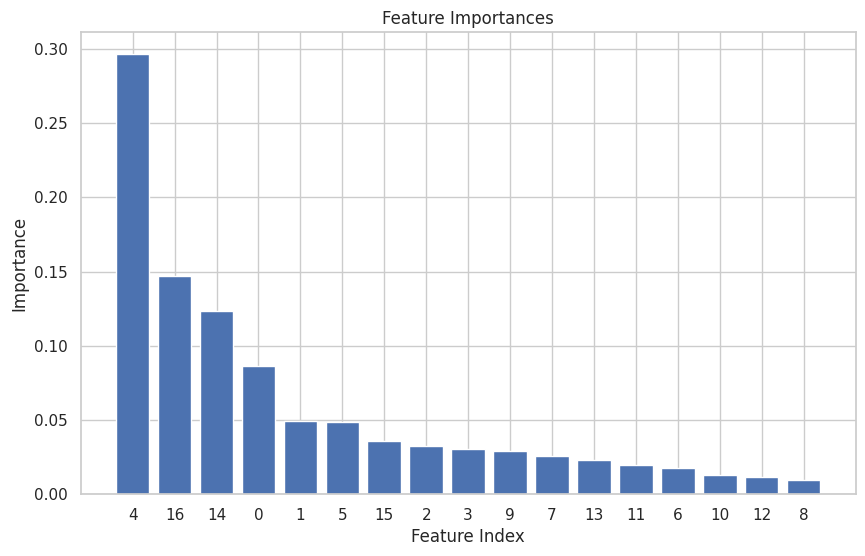

In [24]:
# get feature importances
importances = optimized_rf_classifier.feature_importances_

# get the indices of features in descending order of importance
indices = np.argsort(importances)[::-1] # return the indices that would sort the array, and reverse the array to have the indices from most to least important

feature_names = X_train.columns

# print the feature ranking
print("Feature ranking:")
for rank, index in enumerate(indices, 1):  # (index, element)
    feature_name = feature_names[index]
    importance_value = importances[index]
    print(f"{rank}. Feature {index}: {feature_name} ({importance_value:.4f})")
# eg. the largest element has the lowest rank

# plot the feature importances
# X_train.shape[1] represents the number of features in the dataset
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align = "center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

## Logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
lr_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {lr_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 96.88%
Testing Accuracy: 87.50%
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.71      1.00      0.83         5
           2       1.00      1.00      1.00         8
           3       0.50      0.50      0.50         2

    accuracy                           0.88        24
   macro avg       0.80      0.82      0.80        24
weighted avg       0.90      0.88      0.88        24



## SVM

In [26]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
        
y_pred_test = svm.predict(X_test)
y_pred_train = svm.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
svm_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {svm_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 84.38%
Testing Accuracy: 62.50%
Classification report:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.50      1.00      0.67         5
           2       1.00      0.38      0.55         8
           3       0.25      0.50      0.33         2

    accuracy                           0.62        24
   macro avg       0.65      0.64      0.57        24
weighted avg       0.78      0.62      0.63        24



## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)

y_pred_test = knn_classifier.predict(X_test)
y_pred_train = knn_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
knn_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {knn_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 73.96%
Testing Accuracy: 66.67%
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.67      0.80      0.73         5
           2       1.00      0.38      0.55         8
           3       0.17      0.50      0.25         2

    accuracy                           0.67        24
   macro avg       0.68      0.64      0.60        24
weighted avg       0.82      0.67      0.69        24



## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_pred_test = nb_classifier.predict(X_test)
y_pred_train = nb_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
nb_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {nb_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 76.04%
Testing Accuracy: 75.00%
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.67      0.40      0.50         5
           2       0.73      1.00      0.84         8
           3       0.33      0.50      0.40         2

    accuracy                           0.75        24
   macro avg       0.68      0.67      0.65        24
weighted avg       0.78      0.75      0.75        24



## Decision tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(max_depth = 7)
dt_classifier.fit(X_train, y_train)

y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
dt_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {dt_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 100.00%
Testing Accuracy: 87.50%
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.60      0.75         5
           2       0.80      1.00      0.89         8
           3       1.00      0.50      0.67         2

    accuracy                           0.88        24
   macro avg       0.93      0.78      0.81        24
weighted avg       0.90      0.88      0.86        24



## Gradient boosting

In [30]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred_test = xgb_classifier.predict(X_test)
y_pred_train = xgb_classifier.predict(X_train)

# evaluate the model
# calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training Accuracy: {train_accuracy:.2%}")

# calculate accuracy on the test set
xgb_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Testing Accuracy: {xgb_accuracy:.2%}")

print('Classification report:')
print(classification_report(y_test, y_pred_test))

Training Accuracy: 100.00%
Testing Accuracy: 91.67%
Classification report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.80      0.89         5
           2       0.89      1.00      0.94         8
           3       1.00      0.50      0.67         2

    accuracy                           0.92        24
   macro avg       0.95      0.82      0.86        24
weighted avg       0.93      0.92      0.91        24



In [31]:
models = pd.DataFrame({
    'Model': ['Random forest', 'Logistic regression', 'SVM', 'KNN', 'Naive Bayes', 'Decision tree', 'XGB'],
    'Score': [rf_accuracy, lr_accuracy, svm_accuracy, knn_accuracy, nb_accuracy, dt_accuracy, xgb_accuracy]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random forest,0.958333
6,XGB,0.916667
1,Logistic regression,0.875000
5,Decision tree,0.875000
4,Naive Bayes,0.750000
3,KNN,0.666667
2,SVM,0.625000


## Cross-validation for all the models to compare their performance

In [32]:
from sklearn.model_selection import cross_val_score

models = [optimized_rf_classifier, log_reg, svm, knn_classifier, nb_classifier, dt_classifier, xgb_classifier]

# dictionary to store the cross-validation scores
cv_scores = {}

# iterate over each model
for model in models:
    model_name = model.__class__.__name__  # get the model name, or: model_name = type(model).__name__
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation and calculate the mean accuracy across all folds
    cv_scores[model_name] = np.mean(scores)

# display the cross-validation scores
for model_name, score in cv_scores.items():
    print(f"{model_name}: {score:.4f}")

RandomForestClassifier: 0.9000
LogisticRegression: 0.9000
SVC: 0.7000
KNeighborsClassifier: 0.6750
GaussianNB: 0.7333
DecisionTreeClassifier: 0.7583
XGBClassifier: 0.8583
